# Vacuum Test on June 21, 2022

Plots for the data taken on June 21st in the High Energy Physics Building to how good of a vacuum will be needed in the lens tube for our camera project. We see how transmittance (how much light makes it to the photo multiplier tube (PMT)) changes with a better and better vacuum. We tested this at three different wavlengths. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import cm
import os
from scipy.optimize import curve_fit
from pylab import *
from math import e
import scipy
from scipy import stats
from scipy.stats import norm

I define some lines here which will be used later when I fit lines to the data. 

In [2]:
# Exponential
def line1(x,a,b):
    y2 = (a*(b**x))
    return y2

In [3]:
# S-curve
def line2(x, L ,x0, k):
    #y2 = L / (1 + np.exp(-k*(x-x0))) + b
    y2 = L / (1 + np.exp(-k * (x - x0)))
    return (y2)

First, I use Leslie's videos to write down all the data— the amount of light that make it to the PMTs (in amps) against the vacuum (in Torr). We turned on the vacuum ann watched as the PMT values changed for all of them except the 172nm trial, where we turned off the vacuum

## 172 nm

In [4]:
amps1 = np.array([0.2456, 0.2622, 0.2852, 0.2782, 0.3028, 0.3754, 0.4074, 0.3841, 0.4444, 0.6464, 0.5075, 0.4966, 0.5397, 0.5453, 0.5593, 0.6132, 0.6353, 0.6437, 0.6683, 0.7009, 0.7238, 0.7238, 0.8113, 0.8383, 0.8335, 0.8978, 0.8870, 0.9540, 0.9471, 1.0116, 1.0751, 1.0848, 1.2225, 1.1880, 1.2771, 1.3206, 1.4264, 1.4004, 1.4368, 1.5259, 1.5826, 1.7086, 1.7110, 1.7602, 1.8217, 1.8497, 1.9078, 1.9437, 2.0002, 1.9960, 2.0152, 2.0479, 2.0557, 2.0496, 2.0776])
#microamps
vac1 = np.array([12, 11, 10, 9.6, 9.0, 7.8, 7.5, 7.1, 6.8, 6.6, 6.0, 6.0, 5.7, 5.4, 4.9, 4.6, 4.4, 4.4, 4.2, 4.1, 3.9, 3.8, 3.6, 3.3, 3.2, 3.0, 2.9, 2.7, 2.6, 2.4, 2.2, 2.1, 1.9, 1.7, 1.5, 1.3, 1.1, 1.0, 0.97, 0.9, 0.69, 0.56, 0.44, 0.38, 0.25, 0.21, 0.14, 0.11, 0.065, 0.034, 0.024, 0.01, 0.0038, 0.0015, 0.00085])
#torr

print(len(amps1))
print(len(vac1))

55
55


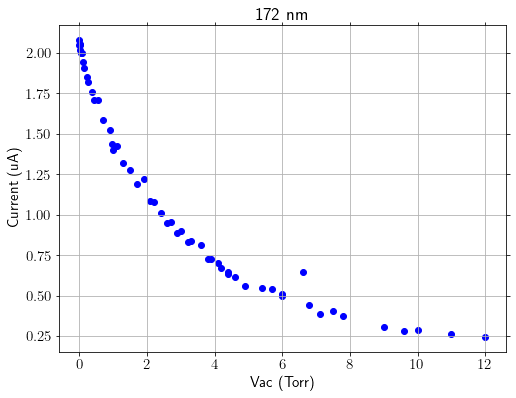

In [5]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Vac (Torr)')
ax1.set_ylabel('Current (uA)')

ax1.scatter(vac1, amps1, color="blue")

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

plt.grid(True)
ax1.set_title("172 nm");

## 175 nm (take 1)

In [6]:
amps2 = np.array([0.9359, 1.0752, 1.1327, 1.2921, 1.4493, 1.4822, 1.5361, 1.6382, 1.6831, 1.7454, 1.8453, 1.9304, 2.0139, 2.0685, 2.0659, 2.0987, 2.1267, 2.1961, 2.1867, 2.1897, 2.1984])
#microamps
vac2 = np.array([6.7, 6.1, 4.6, 4.2, 3.6, 3.1, 2.8, 2.3, 2.0, 1.7, 1.4, 0.93, 0.63, 0.53, 0.39, 0.28, 0.18, 0.12, 0.035, 0.011, 0.0085])
#torr

print(len(amps2))
print(len(vac2))

21
21


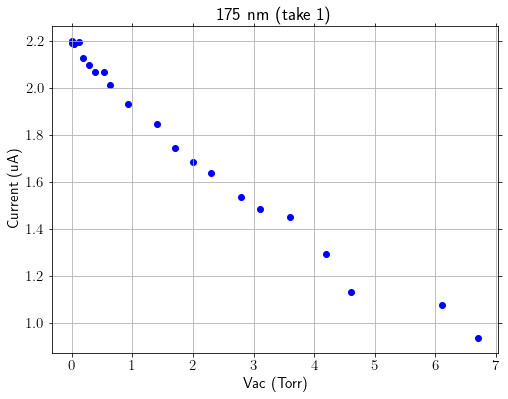

In [7]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Vac (Torr)')
ax1.set_ylabel('Current (uA)')

ax1.scatter(vac2, amps2, color="blue")
#ax1.scatter(vac3, amps3, color="red")

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

plt.grid(True)
ax1.set_title("175 nm (take 1)");

## 175 nm (take 2)

In [8]:
amps3 = np.array([0.8468, 0.9181, 1.0423, 1.2136, 1.2443, 1.3360, 1.5827, 1.6914, 1.7319, 1.7756, 1.8204, 1.9156, 1.9144, 2.0130, 2.0459, 2.0768, 2.1219, 2.1784, 2.1859, 2.1974, 2.2685, 2.2213, 2.2321, 2.1923, 2.2152])
#microamps
vac3 = np.array([7.4, 6.8, 6.2, 5.4, 4.6, 3.7, 2.7, 2.4, 1.9, 1.7, 1.4, 1.1, 0.87, 0.48, 0.35, 0.25, 0.11, 0.0071, 0.003, 0.0021, 0.00085, 0.00084, 0.00076, 0.00071, 0.00033])
#torr

print(len(amps3))
print(len(vac3))

25
25


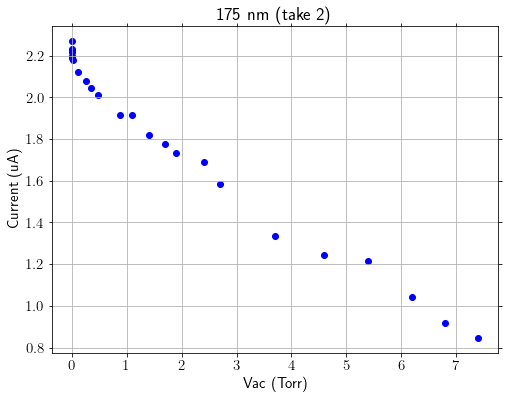

In [9]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Vac (Torr)')
ax1.set_ylabel('Current (uA)')

ax1.scatter(vac3, amps3, color="blue")

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

plt.grid(True)
ax1.set_title("175 nm (take 2)");

## 178 nm

In [10]:
amps4 = np.array([1.6196, 1.6466, 1.6820, 1.6905, 1.7714, 1.7382, 1.8155, 1.7799, 1.8345, 1.8416, 1.8679, 1.9190, 1.8630, 1.9549, 1.9294, 1.9783, 1.9979, 2.0442, 2.0611, 2.0031, 2.0342, 2.0796, 2.1149, 2.1169, 2.1329, 2.1727, 2.1710, 2.1905, 2.2738, 2.2252, 2.2370, 2.3262, 2.3155, 2.3004, 2.3624, 2.3363, 2.3431, 2.3453, 2.3389, 2.3206, 2.3431, 2.3346, 2.3393])
#microamps
vac4 = np.array([7.2, 6.9, 6.5, 5.9, 5.4, 5.1, 4.8, 4.5, 4.1, 3.9, 3.4, 3.2, 3.0, 2.7, 2.5, 2.4, 2.1, 2.0, 1.7, 1.5, 1.4, 1.2, 1.1, 0.87, 0.7, 0.63, 0.47, 0.34, 0.3, 0.25, 0.2, 0.16, 0.13, 0.074, 0.035, 0.025, 0.017, 0.0099, 0.0034, 0.0012, 0.00085, 0.00085, 0.00085])
#torr

print(len(amps4))
print(len(vac4))

43
43


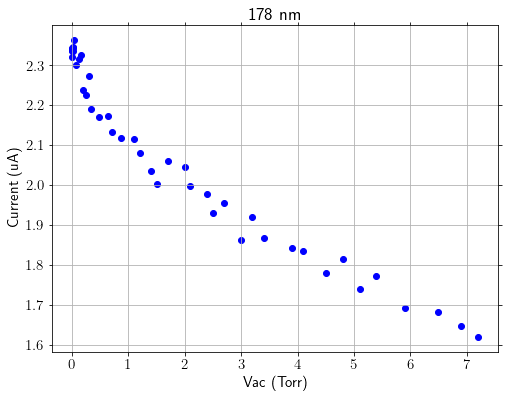

In [11]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Vac (Torr)')
ax1.set_ylabel('Current (uA)')

ax1.scatter(vac4, amps4, color="blue")

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

plt.grid(True)
ax1.set_title("178 nm");

## Plotting All Together

Now that I have all the data copied over from the videos, I want to plot the data all together— all wavelengths on the same plot. We notice that the two trials with the same wavelength (175nm) follow each other closely which is good. 

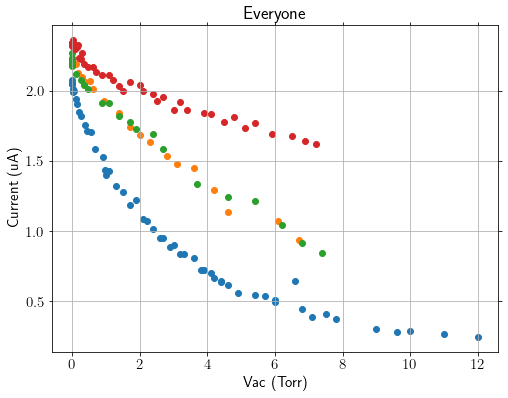

In [12]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Vac (Torr)')
ax1.set_ylabel('Current (uA)')

ax1.scatter(vac1, amps1,)
ax1.scatter(vac2, amps2,)
ax1.scatter(vac3, amps3,)
ax1.scatter(vac4, amps4,)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

plt.grid(True)
ax1.set_title("Everyone");

For 172nm, there is more values plotted at a worse vacuum since for that trial we were tuning the vacuum off. I chopped off a bit of the tail for the sake of a prettier plot, but all 172nm data was used for later adjustment and line fitting.

Below, I do a few steps. First, 0.15uA needs to be subtracted from the PMT values because it is the "null" PMT measurement. After that, I need to find the average of the PMT values at full vacuum. "Full Vacuum" was taken to meant as a vacuum <0.05 Torr

In [13]:
#Subtracting null PMT measurement
amps1r = amps1 - 0.15
amps2r = amps2 - 0.15
amps3r = amps3 - 0.15
amps4r = amps4 - 0.15

#Finding average PMT value at Full Vacuum
fvac1 = np.where(vac1<0.05)
avamp1 = (np.mean(amps1r[fvac1]))

fvac2 = np.where(vac2<0.05)
avamp2 = (np.mean(amps2r[fvac2]))

fvac3 = np.where(vac3<0.05)
avamp3 = (np.mean(amps3r[fvac3]))

fvac4 = np.where(vac4<0.05)
avamp4 = (np.mean(amps4r[fvac4]))

print("Average PMT at Full-Vac for 172nm: " + str(round(avamp1, 4)) + "uA")
print("Average PMT at Full-Vac for 175nm take 1: " + str(round(avamp2, 4)) + "uA")
print("Average PMT at Full-Vac for 175nm take 2: " + str(round(avamp3, 4)) + "uA")
print("Average PMT at Full-Vac for 178nm: " + str(round(avamp4, 4)) + "uA")

Average PMT at Full-Vac for 172nm: 1.8903uA
Average PMT at Full-Vac for 175nm take 1: 2.0416uA
Average PMT at Full-Vac for 175nm take 2: 2.0614uA
Average PMT at Full-Vac for 178nm: 2.1904uA


Using the Average PMT value at Full-Vac for each of the trials, we can normalize the y-axis so that it is in terms of percent for percent Transmittance

In [14]:
#Normalizing
amps1n = (amps1r/avamp1)
amps2n = (amps2r/avamp2)
amps3n = (amps3r/avamp3)
amps4n = (amps4r/avamp4)

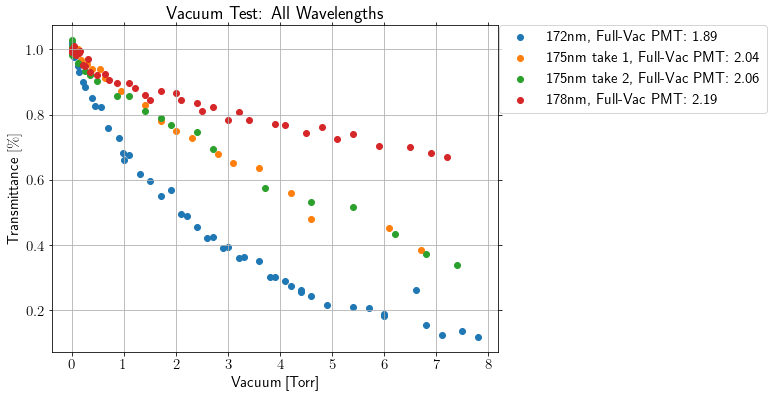

In [15]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Vacuum [Torr]')
ax1.set_ylabel('Transmittance $[\%]$')

ax1.scatter(vac1[5:], amps1n[5:], label= ("172nm, Full-Vac PMT: " + str(round(avamp1,2))))
ax1.scatter(vac2, amps2n, label= ("175nm take 1, Full-Vac PMT: " + str(round(avamp2,2))))
ax1.scatter(vac3, amps3n, label=("175nm take 2, Full-Vac PMT: " + str(round(avamp3,2))))
ax1.scatter(vac4, amps4n, label=("178nm, Full-Vac PMT: " + str(round(avamp4,2))))

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

plt.grid(True)
plt.legend(loc='lower right',bbox_to_anchor=(1.38, 0.66),bbox_transform=plt.gcf().transFigure)
ax1.set_title("Vacuum Test: All Wavelengths");

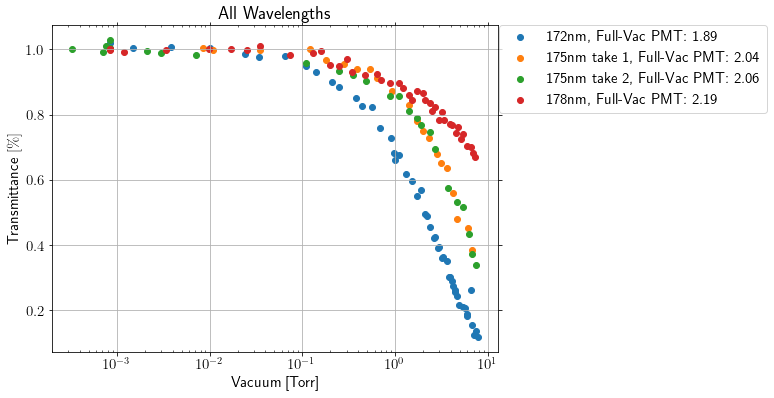

In [16]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Vacuum [Torr]')
ax1.set_ylabel('Transmittance $[\%]$')

ax1.scatter(vac1[5:], amps1n[5:], label= ("172nm, Full-Vac PMT: " + str(round(avamp1,2))))
ax1.scatter(vac2, amps2n, label= ("175nm take 1, Full-Vac PMT: " + str(round(avamp2,2))))
ax1.scatter(vac3, amps3n, label=("175nm take 2, Full-Vac PMT: " + str(round(avamp3,2))))
ax1.scatter(vac4, amps4n, label=("178nm, Full-Vac PMT: " + str(round(avamp4,2))))

ax1.set_xscale('log')

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

plt.grid(True)
plt.legend(loc='lower right',bbox_to_anchor=(1.38, 0.66),bbox_transform=plt.gcf().transFigure)
ax1.set_title("All Wavelengths");

## Fits 

Now we can fit some lines to the data. An exponential function should fit this data if the x-axis is right. 

I use curve_fit to do this. I also want to see what the Transmittance would be based on these fits if there was a full vacuum. In theory, it should be 100% 

In [17]:
popt1, pcov1 = curve_fit(line1, vac1, amps1n)
xarr1 = np.linspace(np.min(vac1),np.max(vac1), 1000)
yarr1 = line1(xarr1, *popt1)

popt2, pcov2 = curve_fit(line1, vac2, amps2n)
xarr2 = np.linspace(np.min(vac2),np.max(vac2), 1000)
yarr2 = line1(xarr2, *popt2)

popt3, pcov3 = curve_fit(line1, vac3, amps3n)
xarr3 = np.linspace(np.min(vac3),np.max(vac3), 1000)
yarr3 = line1(xarr3, *popt3)

popt4, pcov4 = curve_fit(line1, vac4, amps4n)
xarr4 = np.linspace(np.min(vac4),np.max(vac4), 1000)
yarr4 = line1(xarr4, *popt4)

print("Transmittance at 0 Torr for 172nm: " + str(round(yarr1[0], 4)))
print("Transmittance at 0 Torr for 175nm take 1: " + str(round(yarr2[0], 4)))
print("Transmittance at 0 Torr for 175nm take 2: " + str(round(yarr3[0], 4)))
print("Transmittance at 0 Torr for 178nm: " + str(round(yarr4[0], 4)))

Transmittance at 0 Torr for 172nm: 0.9695
Transmittance at 0 Torr for 175nm take 1: 0.9998
Transmittance at 0 Torr for 175nm take 2: 0.9902
Transmittance at 0 Torr for 178nm: 0.9744


We are unsure why 172nm and 178nm aren't closer to 100%. I was thinking mayeb I would go back and see if I can get more values towards the ends of those videos

Next I plot it all together, both as is and with an x-axis in log scale

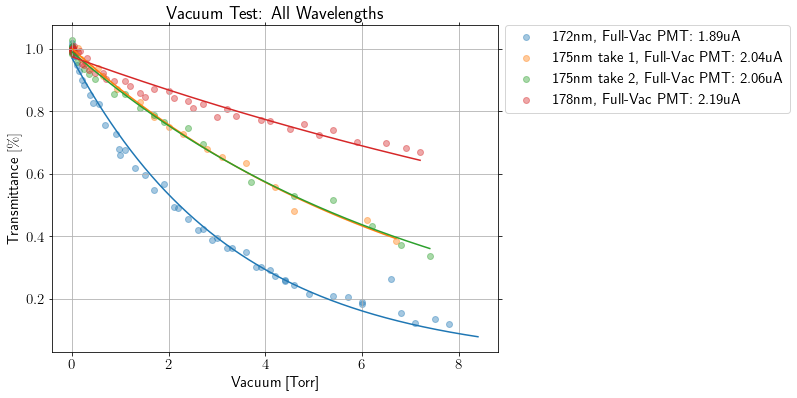

In [18]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('Vacuum [Torr]')
ax1.set_ylabel('Transmittance $[\%]$')

ax1.scatter(vac1[5:], amps1n[5:], label= ("172nm, Full-Vac PMT: " + str(round(avamp1,2)) + "uA"), alpha=0.4)
ax1.scatter(vac2, amps2n, label= ("175nm take 1, Full-Vac PMT: " + str(round(avamp2,2))+ "uA"), alpha=0.4)
ax1.scatter(vac3, amps3n, label=("175nm take 2, Full-Vac PMT: " + str(round(avamp3,2))+ "uA"), alpha=0.4)
ax1.scatter(vac4, amps4n, label=("178nm, Full-Vac PMT: " + str(round(avamp4,2))+ "uA"), alpha=0.4)

ax1.plot(xarr1[:700],yarr1[:700])
ax1.plot(xarr2,yarr2)
ax1.plot(xarr3,yarr3)
ax1.plot(xarr4,yarr4)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

plt.grid(True)
plt.legend(loc='lower right',bbox_to_anchor=(1.42, 0.66),bbox_transform=plt.gcf().transFigure)
ax1.set_title("Vacuum Test: All Wavelengths");

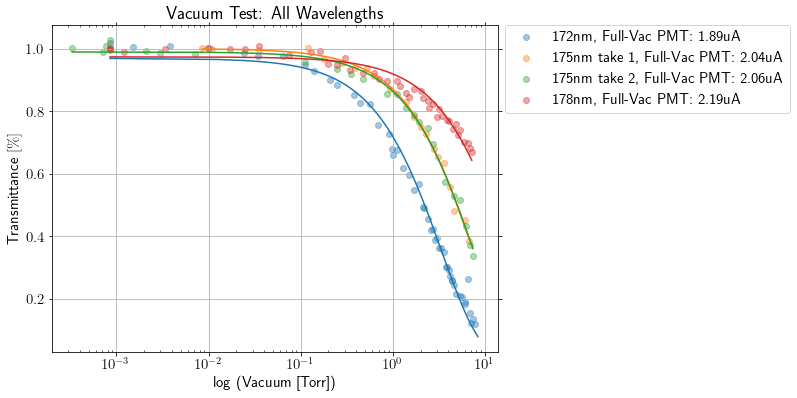

In [19]:
matplotlib.rc('text',usetex=True)
matplotlib.rc('font',size=15)
fig1,ax1 = plt.subplots(figsize=(8,6))

ax1.set_xlabel('log (Vacuum [Torr])')
ax1.set_ylabel('Transmittance $[\%]$')

ax1.scatter(vac1[5:], amps1n[5:], label= ("172nm, Full-Vac PMT: " + str(round(avamp1,2))+ "uA"), alpha=0.4)
ax1.scatter(vac2, amps2n, label= ("175nm take 1, Full-Vac PMT: " + str(round(avamp2,2))+ "uA"), alpha=0.4)
ax1.scatter(vac3, amps3n, label=("175nm take 2, Full-Vac PMT: " + str(round(avamp3,2))+ "uA"), alpha=0.4)
ax1.scatter(vac4, amps4n, label=("178nm, Full-Vac PMT: " + str(round(avamp4,2))+ "uA"), alpha=0.4)

ax1.plot(xarr1[:700],yarr1[:700])
ax1.plot(xarr2,yarr2,)
ax1.plot(xarr3,yarr3,)
ax1.plot(xarr4,yarr4)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_xscale('log')

plt.grid(True)
plt.legend(loc='lower right',bbox_to_anchor=(1.42, 0.66),bbox_transform=plt.gcf().transFigure)
ax1.set_title("Vacuum Test: All Wavelengths");